<div style="display: flex; background-color: RGB(26,39,55);" >
<h1 style="margin: auto; padding: 30px; color:white;">Etude de Marché</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
sns.set()
import os
from functions import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '1 - Préparation-Etude_marche.ipynb',
 '2 - ACP-CHA-KMeans.ipynb',
 'Culture_Poulet2019-2023.csv',
 'dfX_scaled.csv',
 'Etude_marche.csv',
 'functions.py',
 'import_conso_2019_2022.csv',
 'PIB.csv',
 'Population_evol_2019_2023.csv',
 'Prix à la Production.csv',
 'Préparation-Etude_marche-Copy1.ipynb',
 'Préparation-Etude_marche-Copy2.ipynb',
 'Préparation-Etude_marche.ipynb',
 '__pycache__']

In [4]:
#Récupération des fichiers pour analyse
df_prod=pd.read_csv("import_conso_2019_2022.csv")
df_culture=pd.read_csv("Culture_Poulet2019-2023.csv")
df_popu=pd.read_csv("Population_evol_2019_2023.csv")
df_PIB = pd.read_csv("PIB.csv",sep=",")
df_prix= pd.read_csv("Prix à la Production.csv")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyses et Nettoyages des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 Conso Alimentaire 2019-2022</h3>
</div>

In [5]:
df_prod.head(5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2019,2019,1000 t,28,I,Valeur imputée par une agence réceptrice,NaN
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5611,Importations - quantité,S2734,Viande de Volailles,2019,2019,1000 t,44,I,Valeur imputée par une agence réceptrice,NaN
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5142,Nourriture,S2734,Viande de Volailles,2019,2019,1000 t,69,I,Valeur imputée par une agence réceptrice,NaN
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2020,2020,1000 t,28,I,Valeur imputée par une agence réceptrice,NaN
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5611,Importations - quantité,S2734,Viande de Volailles,2020,2020,1000 t,36,I,Valeur imputée par une agence réceptrice,NaN


In [6]:
#Retrait des colonnes non nécessaires
df_prod.drop(['Code Domaine', 'Domaine', 'Code zone (M49)',  'Code Élément',
       'Code Produit (FBS)', 'Code année','Unité', 'Symbole', 'Description du Symbole', 'Note'], axis=1, inplace=True)

In [7]:
#Retrait des produits non nécessaires
df_prod=df_prod[df_prod["Produit"]=="Viande de Volailles"].reset_index(drop=True)

In [8]:
df_prod.drop(["Produit"], axis=1, inplace=True)

In [9]:
#Croissance 2019 - 2022
df_prod_2019_2022 = df_prod[df_prod["Année"].isin([2019, 2022])]

In [10]:
df_prod_2019_2022.head(4)

,Zone,Élément,Année,Valeur
0,Afghanistan,Production,2019,28
1,Afghanistan,Importations - quantité,2019,44
2,Afghanistan,Nourriture,2019,69
11,Afghanistan,Production,2022,29


In [11]:
df_prod = df_prod_2019_2022.pivot_table(index='Zone', columns=('Élément','Année'), values ='Valeur', aggfunc = 'sum', fill_value=0).reset_index()

In [12]:
df_prod.head(5)

Élément            Zone Exportations - quantité      Importations - quantité  \
Année                                      2019 2022                    2019   
0           Afghanistan                       0    0                      44   
1        Afrique du Sud                      49   50                     488   
2               Albanie                       0    0                      22   
3               Algérie                       1    0                       0   
4             Allemagne                     644  664                     831   

Élément      Nourriture       Production        
Année   2022       2019  2022       2019  2022  
0          7         69    36         28    29  
1        304       2178  2370       1816  1958  
2         47         35    64         13    18  
3          0        280   275        285   275  
4        789       1445  1376       1544  1507

In [13]:
#Calcule d'un indicateur synthique (Feature Engineering) croissance pour "importation, nourriture"
for var in ["Importations - quantité", "Nourriture", "Production"]:
    df_prod[(var, "Croissance")] = (
        (df_prod[(var, 2022)] - df_prod[(var, 2019)])
        / df_prod[(var, 2019)].replace(0, np.nan)
    ) * 100

In [14]:
#Remise à plat du DataFrame
df_prod.columns = [
    "_".join([str(c) for c in col if c])  # ignore les vides
    for col in df_prod.columns.to_flat_index()
]

In [15]:
df_prod

,Zone,Exportations - quantité_2019,Exportations - quantité_2022,Importations - quantité_2019,Importations - quantité_2022,Nourriture_2019,Nourriture_2022,Production_2019,Production_2022,Importations - quantité_Croissance,Nourriture_Croissance,Production_Croissance
0,Afghanistan,0,0,44,7,69,36,28,29,-84.090909,-47.826087,3.571429
1,Afrique du Sud,49,50,488,304,2178,2370,1816,1958,-37.704918,8.815427,7.819383
2,Albanie,0,0,22,47,35,64,13,18,113.636364,82.857143,38.461538
3,Algérie,1,0,0,0,280,275,285,275,NaN,-1.785714,-3.508772
4,Allemagne,644,664,831,789,1445,1376,1544,1507,-5.054152,-4.775087,-2.396373
...,...,...,...,...,...,...,...,...,...,...,...,...
184,Équateur,0,0,0,1,322,518,322,517,NaN,60.869565,60.559006
185,États-Unis d'Amérique,3725,3994,123,191,19212,18111,22878,22030,55.284553,-5.730793,-3.706618
186,Éthiopie,0,0,1,0,56,49,58,49,-100.000000,-12.500000,-15.517241
187,Îles Marshall,0,0,2,3,2,3,0,0,50.000000,50.000000,NaN


In [16]:
df_prod.columns

Index(['Zone', 'Exportations - quantité_2019', 'Exportations - quantité_2022',
       'Importations - quantité_2019', 'Importations - quantité_2022',
       'Nourriture_2019', 'Nourriture_2022', 'Production_2019',
       'Production_2022', 'Importations - quantité_Croissance',
       'Nourriture_Croissance', 'Production_Croissance'],
      dtype='object')

In [17]:
#Renommer les colonnes
df_prod.columns=['Pays', 'Exportations_quantité_2019', 'Exportations_quantité_2022',
       'Importations_quantité_2019', 'Importations_2022',
       'Consommation_2019', 'Consommation_2022', 'Production_2019',
       'Production_2022', 'Importations_quantité_Croissance',
       'Nourriture_Croissance', 'Production_Croissance']

In [18]:
#Mise en place d'un indicateur ratio conso/prodImp
df_prod["Radio_conso"]=df_prod["Consommation_2022"]/(df_prod["Production_2022"]+df_prod["Importations_2022"])

In [19]:
df_prod.columns

Index(['Pays', 'Exportations_quantité_2019', 'Exportations_quantité_2022',
       'Importations_quantité_2019', 'Importations_2022', 'Consommation_2019',
       'Consommation_2022', 'Production_2019', 'Production_2022',
       'Importations_quantité_Croissance', 'Nourriture_Croissance',
       'Production_Croissance', 'Radio_conso'],
      dtype='object')

In [20]:
#Retrait des colonnes inutiles pour DF final
df_prod.drop(['Exportations_quantité_2019', 'Exportations_quantité_2022',
       'Importations_quantité_2019', 'Consommation_2019', 'Production_2019', 'Production_2022'], axis=1, inplace=True)

In [21]:
df_prod

,Pays,Importations_2022,Consommation_2022,Importations_quantité_Croissance,Nourriture_Croissance,Production_Croissance,Radio_conso
0,Afghanistan,7,36,-84.090909,-47.826087,3.571429,1.000000
1,Afrique du Sud,304,2370,-37.704918,8.815427,7.819383,1.047745
2,Albanie,47,64,113.636364,82.857143,38.461538,0.984615
3,Algérie,0,275,NaN,-1.785714,-3.508772,1.000000
4,Allemagne,789,1376,-5.054152,-4.775087,-2.396373,0.599303
...,...,...,...,...,...,...,...
184,Équateur,1,518,NaN,60.869565,60.559006,1.000000
185,États-Unis d'Amérique,191,18111,55.284553,-5.730793,-3.706618,0.815040
186,Éthiopie,0,49,-100.000000,-12.500000,-15.517241,1.000000
187,Îles Marshall,3,3,50.000000,50.000000,NaN,1.000000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Population 2019 - 2023</h3>
</div>

In [22]:
df_popu.head(3)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2019,2019,1000 No,37856.121,X,Chiffre de source externe,NaN
1,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2020,2020,1000 No,39068.979,X,Chiffre de source externe,NaN
2,OA,Séries temporelles annuelles,4,Afghanistan,511,Population totale,3010,Population-Estimations,2021,2021,1000 No,40000.412,X,Chiffre de source externe,NaN


In [23]:
df_popu=df_popu[["Zone","Année", "Valeur"]]

In [24]:
df_popu

,Zone,Année,Valeur
0,Afghanistan,2019,37856.121
1,Afghanistan,2020,39068.979
2,Afghanistan,2021,40000.412
3,Afghanistan,2022,40578.842
4,Afghanistan,2023,41454.761
...,...,...,...
1165,Zimbabwe,2019,15271.368
1166,Zimbabwe,2020,15526.888
1167,Zimbabwe,2021,15797.210
1168,Zimbabwe,2022,16069.056


In [25]:
df_popu_2019_2023= df_popu.pivot_table(
    index=["Zone"],
    columns="Année",
    values="Valeur"
).reset_index()

In [26]:
df_popu_2019_2023

Année,Zone,2019,2020,2021,2022,2023
0,Afghanistan,37856.121,39068.979,40000.412,40578.842,41454.761
1,Afrique du Sud,59587.885,60562.381,61502.603,62378.410,63212.384
2,Albanie,2885.010,2871.954,2849.635,2827.608,2811.655
3,Algérie,43294.546,44042.091,44761.099,45477.389,46164.219
4,Allemagne,83559.186,83628.708,83697.083,84086.227,84548.231
...,...,...,...,...,...,...
229,Îles Salomon,728.147,744.498,762.591,781.066,800.005
230,Îles Turques-et-Caïques,43.166,44.386,45.243,45.847,46.198
231,Îles Vierges américaines,89.373,87.707,87.223,86.507,85.701
232,Îles Vierges britanniques,36.395,37.135,37.809,38.319,38.985


In [27]:
#Calcule taux de croissance moyenne (Feature Engineering)
df_popu_2019_2023["croissance_moy"] = (
    (df_popu_2019_2023[2023] / df_popu_2019_2023[2019]) ** (1/4) - 1
) * 100

In [28]:
df_popu_2019_2023

Année,Zone,2019,2020,2021,2022,2023,croissance_moy
0,Afghanistan,37856.121,39068.979,40000.412,40578.842,41454.761,2.296218
1,Afrique du Sud,59587.885,60562.381,61502.603,62378.410,63212.384,1.487148
2,Albanie,2885.010,2871.954,2849.635,2827.608,2811.655,-0.641809
3,Algérie,43294.546,44042.091,44761.099,45477.389,46164.219,1.617399
4,Allemagne,83559.186,83628.708,83697.083,84086.227,84548.231,0.294607
...,...,...,...,...,...,...,...
229,Îles Salomon,728.147,744.498,762.591,781.066,800.005,2.380774
230,Îles Turques-et-Caïques,43.166,44.386,45.243,45.847,46.198,1.711566
231,Îles Vierges américaines,89.373,87.707,87.223,86.507,85.701,-1.043372
232,Îles Vierges britanniques,36.395,37.135,37.809,38.319,38.985,1.733492


In [29]:
df_popu_2019_2023.drop([2019, 2020, 2021, 2022], axis=1, inplace=True)

In [30]:
df_popu_2019_2023.columns=["Pays","Nbe_habitants","Volatilite"]

In [31]:
df_popu_2019_2023.head(3)

,Pays,Nbe_habitants,Volatilite
0,Afghanistan,41454.761,2.296218
1,Afrique du Sud,63212.384,1.487148
2,Albanie,2811.655,-0.641809


In [32]:
#Retrait de la chine pour conserver la chine continentale
df_popu_2019_2023=df_popu_2019_2023[df_popu_2019_2023["Pays"]!="Chine"].reset_index(drop= True)
df_popu_2019_2023=df_popu_2019_2023.copy()

In [33]:
df_popu_2019_2023["%_habitant"] = (df_popu_2019_2023["Nbe_habitants"] / (df_popu_2019_2023["Nbe_habitants"].sum())) * 100

In [34]:
df_popu_2019_2023=df_popu_2019_2023.sort_values("Nbe_habitants",ascending = False).reset_index(drop=True)

In [35]:
df_popu_2019_2023["%_cumulé"] = df_popu_2019_2023["%_habitant"].cumsum()

In [36]:
df_popu_2019_2023.head(5)

,Pays,Nbe_habitants,Volatilite,%_habitant,%_cumulé
0,Inde,1438069.596,0.871167,17.776184,17.776184
1,"Chine, continentale",1422584.933,-0.016432,17.584776,35.360960
2,États-Unis d'Amérique,343477.335,0.418286,4.245772,39.606732
3,Indonésie,281190.067,0.788875,3.475831,43.082563
4,Pakistan,247504.495,1.762179,3.059438,46.142002


In [37]:
df_popu_2023=df_popu_2019_2023.copy()

In [38]:
df_popu_2023[df_popu_2023["%_cumulé"]<60]

,Pays,Nbe_habitants,Volatilite,%_habitant,%_cumulé
0,Inde,1438069.596,0.871167,17.776184,17.776184
1,"Chine, continentale",1422584.933,-0.016432,17.584776,35.360960
2,États-Unis d'Amérique,343477.335,0.418286,4.245772,39.606732
3,Indonésie,281190.067,0.788875,3.475831,43.082563
4,Pakistan,247504.495,1.762179,3.059438,46.142002
5,Nigéria,227882.945,2.126722,2.816894,48.958895
6,Brésil,211140.729,0.441176,2.609941,51.568836
7,Bangladesh,171466.990,0.979071,2.119528,53.688364
8,Fédération de Russie,145440.500,-0.186926,1.797811,55.486175
9,Mexique,129739.759,0.781325,1.603732,57.089907


In [39]:
#Selection des 100 premiers pays par habitants
df_popu_2023f=df_popu_2023.sort_values(["Nbe_habitants"], ascending=False).head(110)

In [40]:
df_popu_2023f

,Pays,Nbe_habitants,Volatilite,%_habitant,%_cumulé
0,Inde,1438069.596,0.871167,17.776184,17.776184
1,"Chine, continentale",1422584.933,-0.016432,17.584776,35.360960
2,États-Unis d'Amérique,343477.335,0.418286,4.245772,39.606732
3,Indonésie,281190.067,0.788875,3.475831,43.082563
4,Pakistan,247504.495,1.762179,3.059438,46.142002
...,...,...,...,...,...
105,Libye,7305.659,1.251744,0.090306,97.225283
106,Kirghizistan,7073.516,2.159834,0.087437,97.312719
107,Paraguay,6844.146,1.239559,0.084601,97.397321
108,Nicaragua,6823.613,1.285806,0.084348,97.481669


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - PIB 1970 à 2024</h3>
</div>

In [41]:
df_PIB.head(10)

,Code zone,Code zone (M49),Zone,Code Produit,Produit,Code Élément,Élément,Code année,Année,Unité,Valeur,Symbole,Note
0,2,'004,Afghanistan,22008,Produit Intérieur Brut,6224,Valeur en devise locale standardisée,1970,1970,millions de MLS,78.697146,X,NaN
1,2,'004,Afghanistan,22008,Produit Intérieur Brut,6224,Valeur en devise locale standardisée,1971,1971,millions de MLS,82.397024,X,NaN
2,2,'004,Afghanistan,22008,Produit Intérieur Brut,6224,Valeur en devise locale standardisée,1972,1972,millions de MLS,71.797487,X,NaN
3,2,'004,Afghanistan,22008,Produit Intérieur Brut,6224,Valeur en devise locale standardisée,1973,1973,millions de MLS,77.997271,X,NaN
4,2,'004,Afghanistan,22008,Produit Intérieur Brut,6224,Valeur en devise locale standardisée,1974,1974,millions de MLS,96.996607,X,NaN
5,2,'004,Afghanistan,22008,Produit Intérieur Brut,6224,Valeur en devise locale standardisée,1975,1975,millions de MLS,106.496275,X,NaN
6,2,'004,Afghanistan,22008,Produit Intérieur Brut,6224,Valeur en devise locale standardisée,1976,1976,millions de MLS,114.995981,X,NaN
7,2,'004,Afghanistan,22008,Produit Intérieur Brut,6224,Valeur en devise locale standardisée,1977,1977,millions de MLS,132.895358,X,NaN
8,2,'004,Afghanistan,22008,Produit Intérieur Brut,6224,Valeur en devise locale standardisée,1978,1978,millions de MLS,148.494814,X,NaN
9,2,'004,Afghanistan,22008,Produit Intérieur Brut,6224,Valeur en devise locale standardisée,1979,1979,millions de MLS,161.713716,X,NaN


In [42]:
df_PIB["Élément"].value_counts()

Élément
Valeur US $                                                                                   67384
Croissance annuelle US$                                                                       65886
Valeur US $, aux prix du 2015                                                                 58439
Valeur en devise locale standardisée                                                          58202
Croissance annuelle US $, aux prix de 2015                                                    56991
Croissance annuelle en devise locale standardisée                                             56879
Valeur en devise locale standardisée, aux prix du 2015                                        50273
Croissance annuelle en devise locale standardisée, aux prix de 2015                           48997
Part du PIB US $                                                                              40680
Part du PIB US$, aux prix de 2015                                                           

In [43]:
df_PIB=df_PIB.drop(['Code zone', 'Code zone (M49)', 'Code Produit','Code Élément', 'Code année', 'Unité', 'Symbole', 'Note'], axis=1)

In [44]:
#Selection des lignes à conserver
df_PIB=df_PIB[df_PIB["Produit"]=="Produit Intérieur Brut"]
df_PIB=df_PIB[df_PIB["Élément"]=="Valeur US $"]

In [45]:
df_PIB.drop(['Produit', 'Élément'], axis=1, inplace=True)

In [46]:
df_PIB=df_PIB.reset_index(drop=True)

In [47]:
#Calcule de la croissance annuelle en PIB par Pays (Feature Engineering)
df_PIB['Croissance'] = df_PIB.groupby('Zone')['Valeur'].pct_change() * 100

In [48]:
df_PIB.head(5)

,Zone,Année,Valeur,Croissance
0,Afghanistan,1970,1748.886597,NaN
1,Afghanistan,1971,1831.108982,4.701413
2,Afghanistan,1972,1595.555482,-12.863980
3,Afghanistan,1973,1733.333275,8.635099
4,Afghanistan,1974,2155.555500,24.358975


In [49]:
#Calcule de la volatilité en PIB par Pays sur 3 ans(Feature Engineering)
df_PIB['Volatilite_3ans'] = df_PIB.groupby('Zone')['Croissance'].transform(
    lambda x: x.rolling(window=3, min_periods=2).std()
)

In [50]:
#Conservation dela derniere année
df_PIB=df_PIB[df_PIB["Année"]==2024]

In [51]:
df_PIB.head(3)

,Zone,Année,Valeur,Croissance,Volatilite_3ans
54,Afghanistan,2024,20206.044216,23.081889,15.417359
109,Afrique du Sud,2024,401193.404431,6.197180,6.754440
164,Albanie,2024,26675.673074,16.093879,8.126815


In [52]:
df_PIB.isna().sum()

Zone               0
Année              0
Valeur             0
Croissance         0
Volatilite_3ans    0
dtype: int64

In [53]:
df_PIB.drop(['Année', 'Croissance'], axis=1,inplace=True)

In [54]:
df_PIB.columns=["Pays", "PIB","Volatilite_3ans"]

In [55]:
df_PIB=df_PIB.reset_index(drop=True)

In [56]:
df_PIB.head(5)

,Pays,PIB,Volatilite_3ans
0,Afghanistan,2.020604e+04,15.417359
1,Afrique du Sud,4.011934e+05,6.754440
2,Albanie,2.667567e+04,8.126815
3,Algérie,2.778303e+05,6.009115
4,Allemagne,4.682715e+06,6.512098


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Prix</h3>
</div>

In [57]:
df_prix.head(5)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole
0,PP,Prix à la Production,4,Afghanistan,5539,Indice des prix à la production (2014-2016 = 100),0231,Œufs de poule en coquille frais,2024,2024,7021,Valeur annuel,NaN,126.49,I,Valeur imputée par une agence réceptrice
1,PP,Prix à la Production,4,Afghanistan,5539,Indice des prix à la production (2014-2016 = 100),21121b,"Viande poids vif, poulet, fraîche ou réfrigérée",2024,2024,7021,Valeur annuel,NaN,107.59,I,Valeur imputée par une agence réceptrice
2,PP,Prix à la Production,4,Afghanistan,5539,Indice des prix à la production (2014-2016 = 100),21121,"Viande, poulet, fraîche ou réfrigérée",2024,2024,7021,Valeur annuel,NaN,112.43,I,Valeur imputée par une agence réceptrice
3,PP,Prix à la Production,710,Afrique du Sud,5539,Indice des prix à la production (2014-2016 = 100),0231,Œufs de poule en coquille frais,2024,2024,7021,Valeur annuel,NaN,134.04,I,Valeur imputée par une agence réceptrice
4,PP,Prix à la Production,710,Afrique du Sud,5539,Indice des prix à la production (2014-2016 = 100),21121b,"Viande poids vif, poulet, fraîche ou réfrigérée",2024,2024,7021,Valeur annuel,NaN,129.50,I,Valeur imputée par une agence réceptrice


In [58]:
df_prix=df_prix.drop(['Code Domaine', 'Domaine', 'Code zone (M49)', 'Code Élément',
       'Élément', 'Code Produit (CPC)', 'Code année', 'Année',
       'Code Mois', 'Mois', 'Unité', 'Symbole',
       'Description du Symbole'],axis=1)

In [59]:
df_prix=df_prix[df_prix['Produit']=="Viande, poulet, fraîche ou réfrigérée"]

In [60]:
df_prix=df_prix.pivot_table(index="Zone",columns=["Produit"],values="Valeur").reset_index()

In [61]:
df_prix.columns=['Pays', 'prix_poulet']

In [62]:
df_prix

,Pays,prix_poulet
0,Afghanistan,112.43
1,Afrique du Sud,189.04
2,Albanie,126.93
3,Algérie,127.84
4,Allemagne,123.52
...,...,...
137,Équateur,115.90
138,Érythrée,132.25
139,États-Unis d'Amérique,137.08
140,Éthiopie,273.41


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Merge des données</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - merge des dataframes</h3>
</div>

In [63]:
df_final = df_popu_2023f.merge(df_prod, on='Pays', how='left') \
                  .merge(df_PIB, on='Pays', how='left') \
                  .merge(df_prix, on='Pays', how='left')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - complétudes des données manquantes</h3>
</div>

In [64]:
df_final.isna().sum()

Pays                                 0
Nbe_habitants                        0
Volatilite                           0
%_habitant                           0
%_cumulé                             0
Importations_2022                    1
Consommation_2022                    1
Importations_quantité_Croissance    19
Nourriture_Croissance                1
Production_Croissance                1
Radio_conso                          1
PIB                                  1
Volatilite_3ans                      1
prix_poulet                         21
dtype: int64

In [65]:
#Remplacement des valeurs manquantes par 0 pour les importations / Exportation/Consommation /Production
#Remplacement par les valeurs moyennes pour le prix du poulet, le pib et la volatilité du PIB
df_final['Importations_2022'] = df_final['Importations_2022'].fillna(0)
df_final['Consommation_2022'] = df_final['Consommation_2022'].fillna(0)
df_final['Importations_quantité_Croissance'] = df_final['Importations_quantité_Croissance'].fillna(0)
df_final['Radio_conso'] = df_final['Radio_conso'].fillna(0)
df_final['Nourriture_Croissance'] = df_final['Nourriture_Croissance'].fillna(0)
df_final['Production_Croissance'] = df_final['Production_Croissance'].fillna(0)
df_final['prix_poulet'] = df_final['prix_poulet'].fillna( df_final['prix_poulet'].mean())
df_final['PIB'] = df_final['PIB'].fillna(df_final['PIB'].mean())
df_final['Volatilite_3ans'] = df_final['Volatilite_3ans'].fillna(df_final['Volatilite_3ans'].mean())

In [66]:
df_final.head(5)

,Pays,Nbe_habitants,Volatilite,%_habitant,%_cumulé,Importations_2022,Consommation_2022,Importations_quantité_Croissance,Nourriture_Croissance,Production_Croissance,Radio_conso,PIB,Volatilite_3ans,prix_poulet
0,Inde,1438069.596,0.871167,17.776184,17.776184,0.0,4946.0,0.000000,12.870835,12.856166,0.998990,3.902301e+06,2.450094,145.41
1,"Chine, continentale",1422584.933,-0.016432,17.584776,35.360960,1316.0,24436.0,65.534591,15.761050,12.711334,0.988671,1.858097e+07,2.624960,119.81
2,États-Unis d'Amérique,343477.335,0.418286,4.245772,39.606732,191.0,18111.0,55.284553,-5.730793,-3.706618,0.815040,2.916284e+07,2.369784,137.08
3,Indonésie,281190.067,0.788875,3.475831,43.082563,0.0,4077.0,0.000000,2.798790,2.716981,0.998530,1.419410e+06,4.300375,87.84
4,Pakistan,247504.495,1.762179,3.059438,46.142002,0.0,1982.0,0.000000,30.480579,30.137886,1.000000,3.842600e+05,20.022489,111.34


In [67]:
df_final.isna().sum()

Pays                                0
Nbe_habitants                       0
Volatilite                          0
%_habitant                          0
%_cumulé                            0
Importations_2022                   0
Consommation_2022                   0
Importations_quantité_Croissance    0
Nourriture_Croissance               0
Production_Croissance               0
Radio_conso                         0
PIB                                 0
Volatilite_3ans                     0
prix_poulet                         0
dtype: int64

In [68]:
df_final.duplicated().sum()

0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - Préparation données</h3>
</div>

In [69]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Pays                              110 non-null    object 
 1   Nbe_habitants                     110 non-null    float64
 2   Volatilite                        110 non-null    float64
 3   %_habitant                        110 non-null    float64
 4   %_cumulé                          110 non-null    float64
 5   Importations_2022                 110 non-null    float64
 6   Consommation_2022                 110 non-null    float64
 7   Importations_quantité_Croissance  110 non-null    float64
 8   Nourriture_Croissance             110 non-null    float64
 9   Production_Croissance             110 non-null    float64
 10  Radio_conso                       110 non-null    float64
 11  PIB                               110 non-null    float64
 12  Volatili

In [70]:
#Retrait des colonnes non nécessaire à l'ACP '%_habitant', '%_cumulé'
df_final.drop(['%_habitant', '%_cumulé'],axis=1, inplace=True)

In [71]:
#Ajout d'une dimension PIB/habitant
df_final["PIB_habitant"]=df_final["PIB"]/df_final["Nbe_habitants"]

In [72]:
df_final.columns

Index(['Pays', 'Nbe_habitants', 'Volatilite', 'Importations_2022',
       'Consommation_2022', 'Importations_quantité_Croissance',
       'Nourriture_Croissance', 'Production_Croissance', 'Radio_conso', 'PIB',
       'Volatilite_3ans', 'prix_poulet', 'PIB_habitant'],
      dtype='object')

In [73]:
#Renommage des colonnes
mapping_colonnes = {
    "Pays": "Pays",
    "Nbe_habitants": "Nbe_habitants",
    "Volatilite": "Evolution_habitants",
    "Importations_2022": "Importations_2022",
    "Consommation_2022": "Consommation_2022",
    "Importations_Croissance": "Importations_Croissance",
    "Consommation_Croissance": "Consommation_Croissance",
    "Production_Croissance": "Production_Croissance",
    "Ratio_conso": "Ratio_conso",
    "PIB": "PIB",
    "Volatilite_3ans": "PIB_3ans",
    "prix_poulet": "prix_poulet",
    "PIB_habitant": "PIB_habitant"
}

In [74]:
df_final = df_final.rename(columns=mapping_colonnes)

<Axes: >

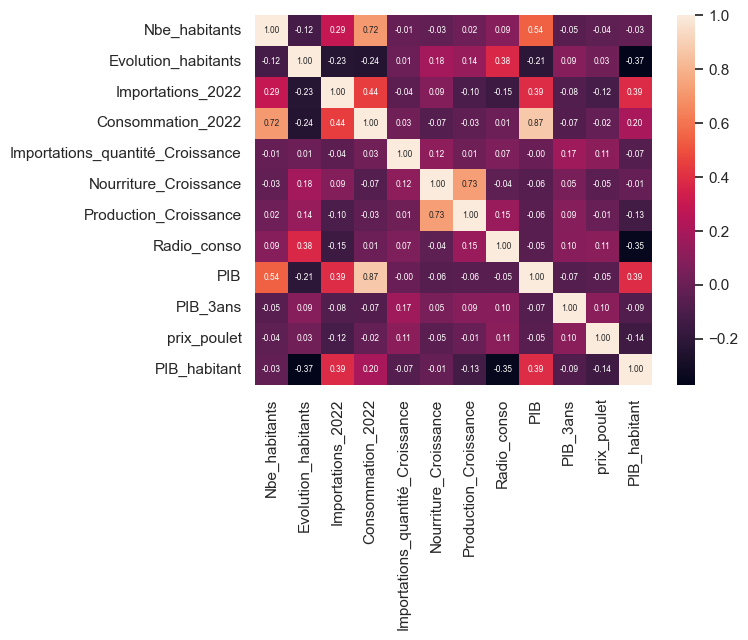

In [75]:
#Controle des corrélations des données
sns.heatmap(df_final.set_index("Pays").corr(), annot=True,fmt='.2f',annot_kws={'size': 6})

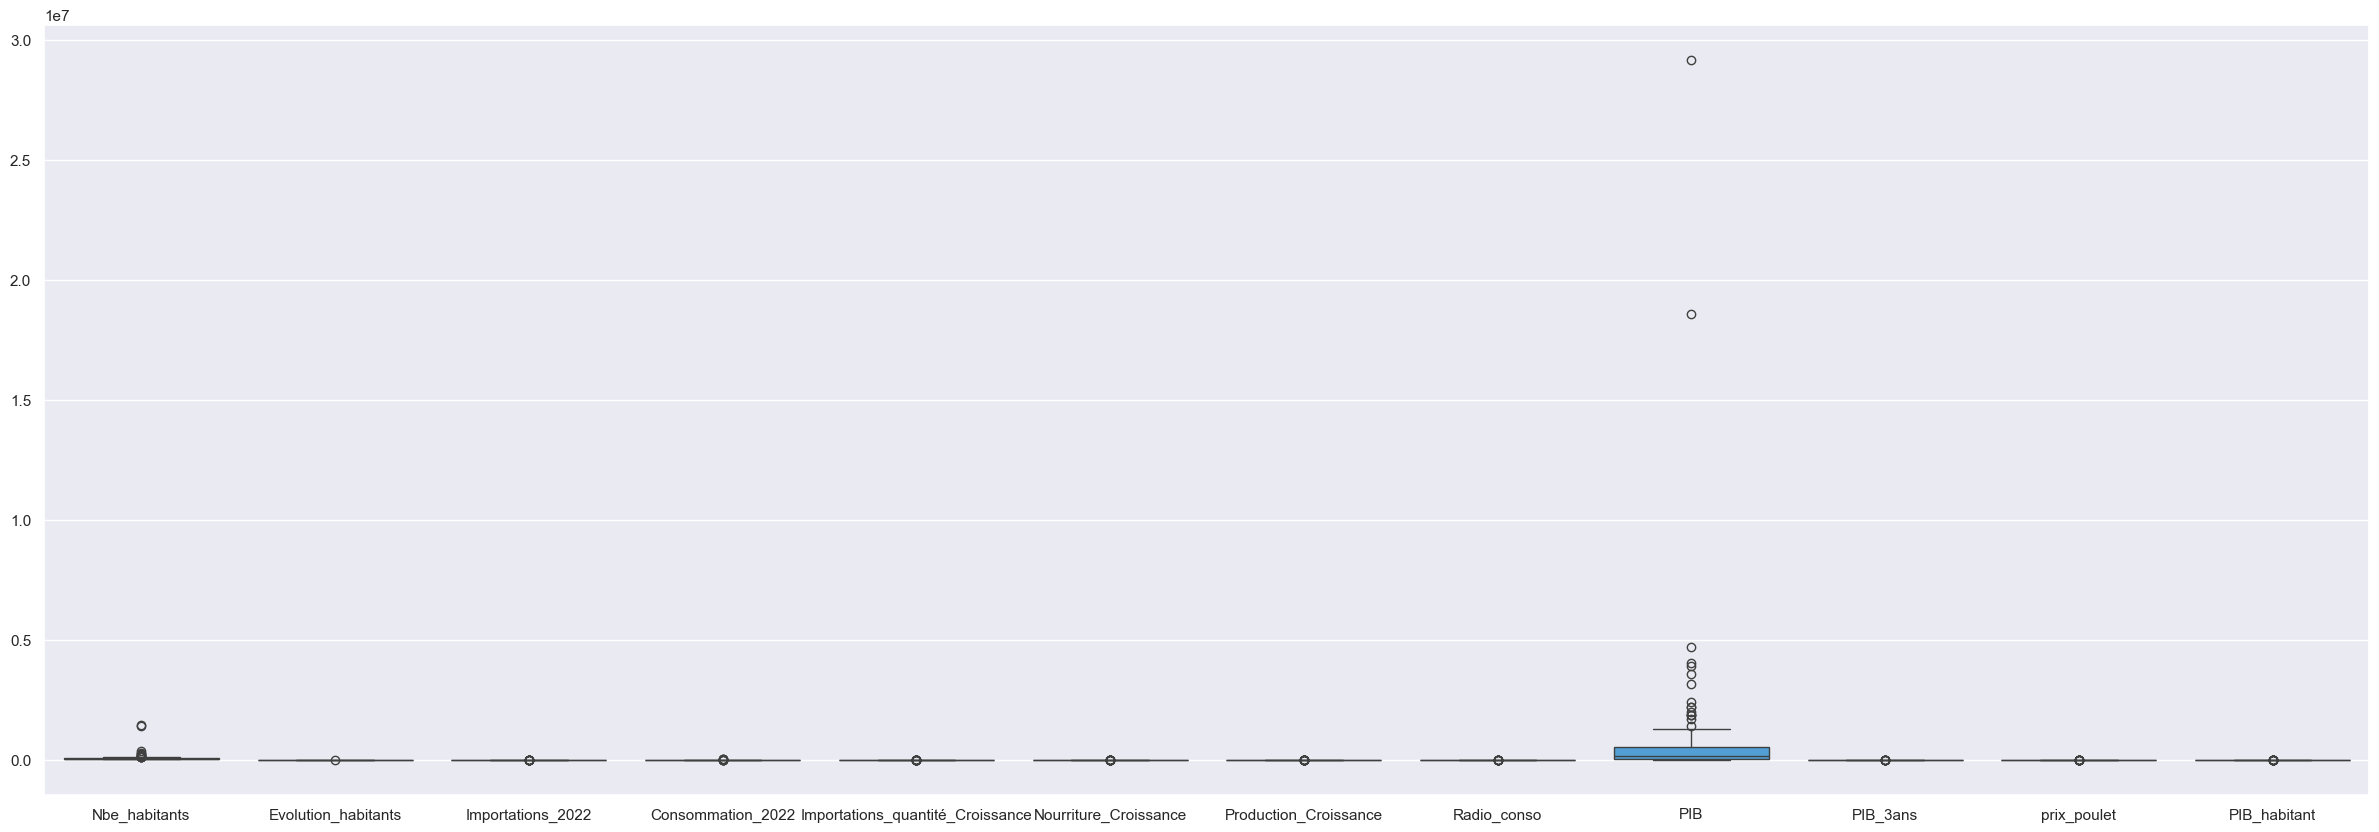

In [76]:
#Identification de potentiels outliers
plt.figure(figsize=(30,10))
sns.boxplot(data=df_final)
plt.show()

In [77]:
#Controle des outliers "nbre habitants"
df_final=df_final.sort_values("PIB", ascending=False).reset_index(drop=True)

In [78]:
#Retrait de deux outliers PIB "Chine et Etats unis"
df_final=df_final.loc[2:,:].reset_index(drop=True)

In [79]:
df_final.sort_values("Nbe_habitants", ascending=False)

,Pays,Nbe_habitants,Evolution_habitants,Importations_2022,Consommation_2022,Importations_quantité_Croissance,Nourriture_Croissance,Production_Croissance,Radio_conso,PIB,PIB_3ans,prix_poulet,PIB_habitant
2,Inde,1438069.596,0.871167,0.0,4946.0,0.000000,12.870835,12.856166,0.998990,3.902301e+06,2.450094,145.410000,2.713569
13,Indonésie,281190.067,0.788875,0.0,4077.0,0.000000,2.798790,2.716981,0.998530,1.419410e+06,4.300375,87.840000,5.047868
35,Pakistan,247504.495,1.762179,0.0,1982.0,0.000000,30.480579,30.137886,1.000000,3.842600e+05,20.022489,111.340000,1.552537
50,Nigéria,227882.945,2.126722,0.0,355.0,-100.000000,40.873016,47.916667,1.000000,1.962842e+05,27.954604,127.350000,0.861338
7,Brésil,211140.729,0.441176,5.0,10131.0,0.000000,1.808863,4.235845,0.689371,2.181106e+06,8.959901,137.690000,10.330104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Libye,7305.659,1.251744,105.0,236.0,38.157895,15.686275,0.775194,1.004255,4.695386e+04,10.989594,160.109551,6.427053
98,Kirghizistan,7073.516,2.159834,40.0,50.0,17.647059,35.135135,40.000000,0.925926,1.574528e+04,10.070011,78.550000,2.225948
78,Paraguay,6844.146,1.239559,1.0,71.0,0.000000,-1.388889,2.597403,0.887500,4.452970e+04,1.311207,116.560000,6.506246
91,Nicaragua,6823.613,1.285806,11.0,165.0,57.142857,23.134328,10.000000,1.000000,1.928958e+04,2.877111,193.060000,2.826886


In [80]:
df_final.describe()

,Nbe_habitants,Evolution_habitants,Importations_2022,Consommation_2022,Importations_quantité_Croissance,Nourriture_Croissance,Production_Croissance,Radio_conso,PIB,PIB_3ans,prix_poulet,PIB_habitant
count,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,1.080000e+02,108.000000,108.000000,108.000000
mean,5.673028e+04,1.336930,130.620370,821.509259,40.837597,16.017981,10.745380,0.893981,5.401279e+05,13.551540,160.695931,14.323943
std,1.438326e+05,1.257109,233.605135,1393.740610,196.217437,38.755593,33.931280,0.189268,9.253914e+05,33.113967,109.621160,20.253120
min,6.795803e+03,-4.285127,0.000000,0.000000,-100.000000,-58.544304,-58.454988,0.000000,4.341704e+03,0.389675,59.760000,0.317157
25%,1.147233e+04,0.591468,2.000000,109.500000,-2.756410,-0.347222,0.000000,0.878062,3.633919e+04,4.091887,110.952500,1.525346
50%,2.496450e+04,1.238318,42.000000,273.500000,0.804284,5.884427,5.157574,0.987490,1.358732e+05,6.716113,132.265000,4.859038
75%,5.046928e+04,2.281803,134.250000,1015.250000,27.552125,23.035418,15.859962,1.000000,5.276361e+05,12.117863,160.109551,15.998967
max,1.438070e+06,3.763187,1163.000000,10131.000000,1850.000000,184.722222,226.984127,1.047745,4.682715e+06,329.021759,941.120000,105.998661


In [81]:
#Sauvegarde du DataFrame Final
df_final.to_csv('Etude_marche.csv', index =False)

In [82]:
df_final.head(20)

,Pays,Nbe_habitants,Evolution_habitants,Importations_2022,Consommation_2022,Importations_quantité_Croissance,Nourriture_Croissance,Production_Croissance,Radio_conso,PIB,PIB_3ans,prix_poulet,PIB_habitant
0,Allemagne,84548.231,0.294607,789.0,1376.0,-5.054152,-4.775087,-2.396373,0.599303,4.682715e+06,6.512098,123.520000,55.385138
1,Japon,124370.947,-0.462650,1163.0,3458.0,2.107112,38.708383,3.220191,0.978218,4.027838e+06,7.508712,123.190000,32.385682
2,Inde,1438069.596,0.871167,0.0,4946.0,0.000000,12.870835,12.856166,0.998990,3.902301e+06,2.450094,145.410000,2.713569
3,Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,68682.962,0.580524,947.0,2397.0,13.822115,4.901532,1.035197,0.826837,3.556264e+06,4.815189,109.790000,51.777972
4,France,66438.822,0.268719,667.0,1590.0,23.290203,-5.131265,-10.963855,0.741259,3.165065e+06,7.526570,138.490000,47.638786
5,Italie,59499.453,-0.263254,142.0,1199.0,51.063830,2.303754,-11.119293,0.888807,2.385742e+06,6.468544,158.140000,40.096874
6,Canada,39299.105,0.988458,206.0,1583.0,9.574468,3.464052,1.660027,0.911341,2.204369e+06,4.285759,108.510000,56.092093
7,Brésil,211140.729,0.441176,5.0,10131.0,0.000000,1.808863,4.235845,0.689371,2.181106e+06,8.959901,137.690000,10.330104
8,Fédération de Russie,145440.500,-0.186926,52.0,4953.0,-77.586207,8.333333,15.240990,0.924067,1.990341e+06,17.685700,142.190000,13.684918
9,Mexique,129739.759,0.781325,1158.0,4950.0,1.401051,6.405847,8.108108,0.998386,1.878718e+06,8.880196,130.250000,14.480664
